<a href="https://colab.research.google.com/github/juliabui/csc408-411/blob/main/CSC408_Mod2_In_class_Activity_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 2: Linear Regression

## Objective
Introduce the basics of linear regression using the Body Fat dataset.

## Dataset
Body Fat dataset can be found here:https://drive.google.com/file/d/1_agb6UXyDlG_pS8kNK7URdTDYR-M4lix
or
https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset


## Instructions
1. Load the Body Fat dataset.
2. Explore the dataset and perform basic data visualization.
3. Perform linear regression and evaluate the model.
4. Discuss the interpretation of the model results.

## Step 1: Load the Dataset

The first thing we need to do is load the dataset. This Body Fat Dataset is located in a Google Drive, so we will load it from there.

`df` is our variable for storing the dataframe.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use the direct link to load the dataset
url = 'https://drive.google.com/uc?id=1_agb6UXyDlG_pS8kNK7URdTDYR-M4lix'
df = pd.read_csv(url)

Verifying that the data loaded

In [ ]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Step 2: Data Visualization

### Here we will visualize the relationship between Weight and Body Fat Percentage.

* If the points show an upward trend (heavier individuals tend to have higher body fat), it suggests a positive correlation.

* This is exactly the kind of relationship that linear regression tries to model.

###Interpreting the Scatter Plot (Body Fat vs. Weight)

1. **Overall Pattern**

  * Each dot is one person, plotted by their Weight (x-axis) and Body Fat % (y-axis).

  * If you notice that as weight increases, body fat also tends to increase, that's a positive correlation.

  * If the points look scattered with no clear direction, then there may be little or no correlation.

2. **Why This Matters for Regression**

  * **Linear regression** tries to draw the best-fitting straight line through the cloud of points.

  * The line represents the average trend: how much Body Fat % changes for each unit increase in Weight.

  * Mathematically, it estimates:

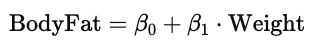

where:

  * 𝛽0 is the intercept (Body Fat when Weight = 0)

  * 𝛽1 is the slope (how much Body Fat % changes per unit weight)

3. **Scatter Density and Spread**

  * If the dots are tightly clustered around an upward-sloping line, then Weight is a strong predictor of Body Fat.

  * If the dots are very spread out, Weight might not explain Body Fat very well — meaning the model will have a lower R² score (explained variance).

4. **Outliers**

  * Any points that are far away from the general trend (e.g., someone very heavy but with unusually low body fat) can affect the regression line.

  * Later, regression diagnostics (like residuals) help identify whether these outliers matter.

**This scatter plot is your first visual check: does a linear relationship exist between Weight and Body Fat? If so, linear regression is a reasonable model.**

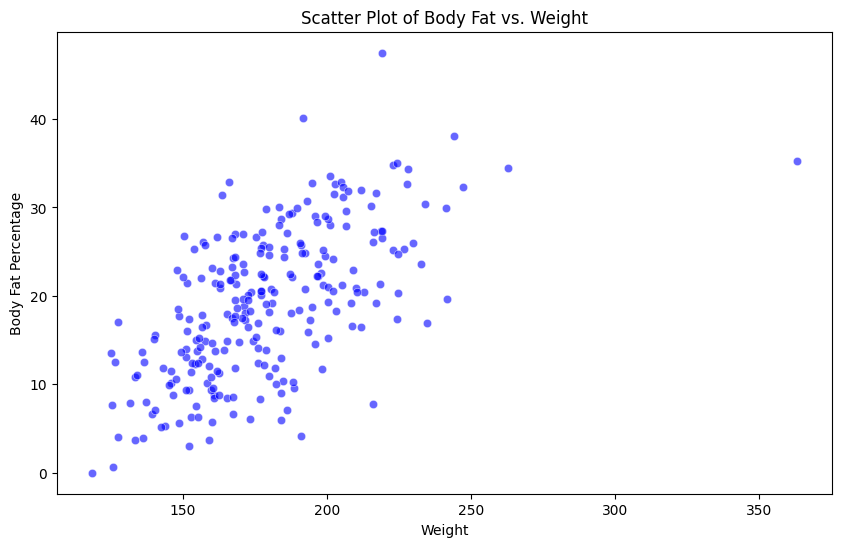

In [ ]:
# Basic data visualization - Scatter plot of Body Fat vs. Weight
plt.figure(figsize=(10, 6)) #create a new figure

#use seaborn
#x-axis = Weight col
#y-axis = BodyFat col
sns.scatterplot(data=df, x='Weight', y='BodyFat', color='blue', alpha=0.6)

#Labels and Title
plt.title('Scatter Plot of Body Fat vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Body Fat Percentage')
plt.show()

**What does this look like to you?**

## Step 3: Linear Regression Model

* X = the input variable(s) (a.k.a. predictors or features).

* Here, it’s a dataframe with just the column Weight.

* The double brackets [['Weight']] keep it as a 2D dataframe (needed for scikit-learn).

* y = the output variable (a.k.a. response or label).

* This is a 1D series of BodyFat.

### We want to predict Body Fat % using Weight.

* train_test_split: Randomly divides your dataset into two parts:

  * X_train, y_train: training data (used to fit the regression model).

  * X_test, y_test: testing data (used to evaluate the model).

* test_size=0.2: 20% of the data goes into the test set, 80% into training.

* random_state=42: ensures the split is reproducible (the same random shuffle each time).

**Here we set up the data so you can train your regression model on one part (training set) and then see how well it generalizes on unseen data (test set).**

In [ ]:
# Preparing the data
X = df[['Weight']]  # Predictor
y = df['BodyFat']   # Response

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

`model = LinearRegression()`

  * Creates an instance of scikit-learn’s LinearRegression class.

* At this point, the model is just an empty object — it hasn’t learned anything yet.

* Behind the scenes, this model will try to find the best-fitting line of the form:

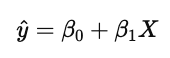


* where:

  * 𝛽0 = intercept (baseline Body Fat when Weight = 0)

  * 𝛽1 = slope (how Body Fat changes per unit increase in
  Weight).
  * y^ (y-hat) is the predicted value of the response variable produced by the regression model.
    * It's not the actual observed y, but rather the model's estimate of y given an input X

`model.fit(X_train, y_train)`

* This is the training step: the model looks at the training data (X_train, y_train) and computes the values of 𝛽0 and 𝛽1 that minimize the error.

Specifically, it uses Ordinary Least Squares (OLS), minimizing the sum of squared errors:

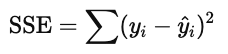
  * SSE = Sum of Squared Errors

  * yi: The actual observed value of the response variable for the i-th data point.

  * y^i: The predicted value of the response variable for the i-th data point, as given by the regression line.

  * (𝑦𝑖−𝑦^𝑖): The residual (or error) for the i-th data point — the difference between actual and predicted.

* After fitting, the model has “learned” the line of best fit

**Here we create a linear regression model and train it on the training data. Now the model knows the slope and intercept of the best-fit line relating Weight → Body Fat.**

In [ ]:
# Creating the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

This line is the inference step: using the trained model to predict Body Fat for unseen data.

* Feeds the test features (X_test, which contains only Weight) into the fitted LinearRegression model.
* Returns a NumPy array y_pred of predicted Body Fat percentages, one for each row in X_test, in the same order as y_test.

Why this matters:

* y_pred is what you’ll compare to the true labels (y_test) to evaluate performance (e.g., with MSE and R² that you imported earlier).





In [ ]:
# Making predictions
y_pred = model.predict(X_test)

`mse = mean_squared_error(y_test, y_pred)`

* Compares the predicted values (y_pred) with the actual values (y_test).

* Formula:

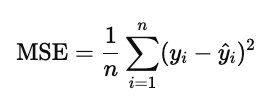


* It penalizes larger errors more than smaller ones because of the squaring.

* Interpretation: the average squared difference between actual and predicted Body Fat %.

* Lower MSE = better model.

* Units: since BodyFat is in %, the MSE is in squared percentage points.


`r2 = r2_score(y_test, y_pred)`

* Tells you how much of the variation in Body Fat is explained by Weight.

* Formula:

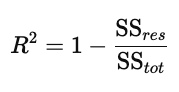

* where:

  * SS𝑟𝑒𝑠 = sum of squared residuals (prediction errors)

  * SS𝑡𝑜𝑡 = total sum of squares (variation around the mean)

* Interpretation:

  * 𝑅2 = 0: model explains nothing.

  * 𝑅2 = 1: model explains all variation.

* Values < 0 can happen if the model performs worse than just predicting the mean.

**This quantifies how well the regression line fits unseen data.**

* MSE tells you the average prediction error size.

* R² tells you what fraction of Body Fat variation is explained by Weight.

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-Squared: {r2:.2f}')

Mean Squared Error: 42.97
R-Squared: 0.08


## Step 4: Model Interpretation

***This lets you interpret what the model actually learned.***

**Intercept**

`print(f'Intercept: {model.intercept_:.2f}')`

* This is 𝛽0 in the regression equation:

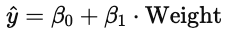


* It represents the predicted Body Fat % when Weight = 0.

* In practice, this value is usually not meaningful on its own (nobody weighs 0), but it’s needed mathematically to anchor the line.

**Coefficient (Slope)**

`print(f'Coefficient for Weight: {model.coef_[0]:.2f}')`

* This is 𝛽1, the slope of the line.

* It tells you how much Body Fat % changes for each additional unit of Weight (whatever unit “Weight” is measured in, likely pounds or kg).

* Example: If the coefficient = 0.15, then each extra pound is associated with a +0.15% increase in body fat.

**This block gives you the regression equation:**

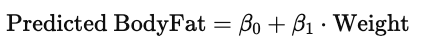


which is the line your model is using to make predictions.





In [ ]:
# Interpreting the model
print(f'Intercept: {model.intercept_:.2f}')
print(f'Coefficient for Weight: {model.coef_[0]:.2f}')

Intercept: -15.85
Coefficient for Weight: 0.20


**Interpreting the Intercept and Coefficient**

* Intercept (𝛽0 = −15.85)

  * This is the predicted value of y when Weight = 0.

  * In practice, if "Weight = 0" is not meaningful in your dataset (e.g., there's no zero-weight case), the intercept mainly serves as a baseline adjustment to position the regression line correctly.

* Coefficient for Weight (𝛽1 = 0.20)
  * For each 1 unit increase in Weight, the model predicts that y will increase by 0.20 units, holding everything else constant.

  * The positive coefficient means the relationship between Weight and the outcome is positive.

**Plot the line**

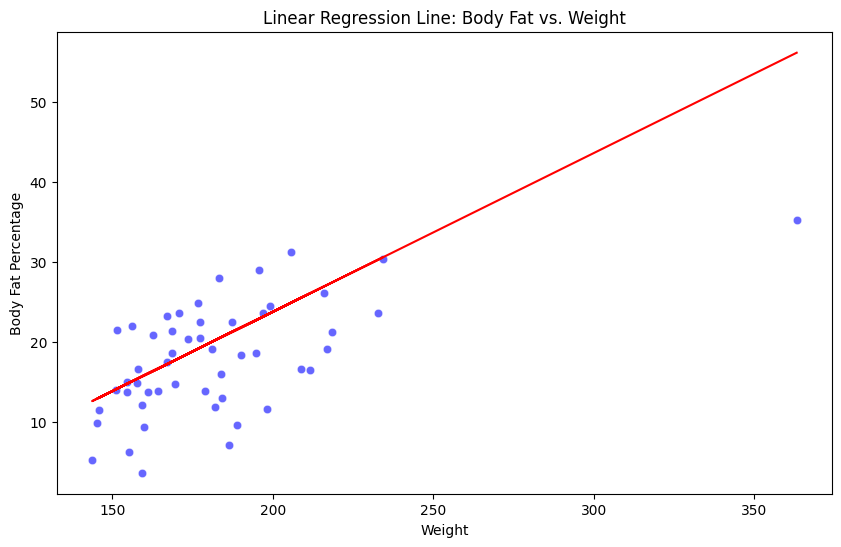

In [ ]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Weight'], y=y_test, color='blue', alpha=0.6)
plt.plot(X_test['Weight'], y_pred, color='red')
plt.title('Linear Regression Line: Body Fat vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Body Fat Percentage')
plt.show()

##Step 5. Interpretation of Fit

* The line captures the general upward trend, but the scatter shows variability:

* Many points are close to the line → the model fits them well.

* Some points are further away → these are residuals (errors in prediction).

* There's one clear outlier (far right: ~350 lbs, ~35% body fat).

* This single point can strongly influence the slope because regression is sensitive to outliers.

**What This Tells Us**

  * Weight is positively correlated with Body Fat %: as weight increases, predicted body fat increases.

  * However, Weight alone does not explain all variation in Body Fat (scatter around the line remains wide).

  * The earlier R² score quantifies this: it tells you what fraction of variability in Body Fat is explained by Weight.

##Step 6: (Optional) Residual Plot

**How to interpret the residual plot:**

* Dots close to 0 (red dashed line): model predictions are accurate.

* Dots far above or below: the model under-predicts (above 0) or over-predicts (below 0).

* Patterns:

  * If residuals are randomly scattered (no pattern), linear regression is a good fit.

  * If residuals form a curve or funnel shape, it means the linear model is missing structure (maybe Body Fat depends on more than just Weight, or the relationship isn’t linear).

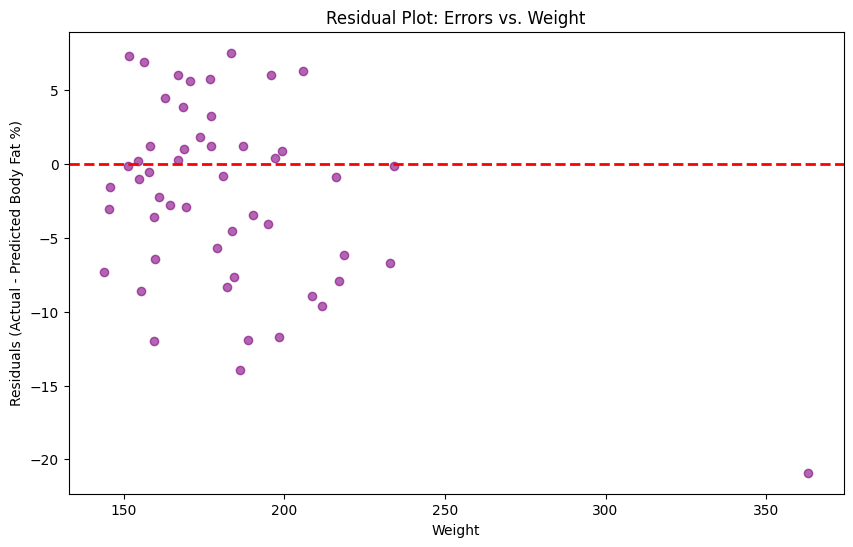

In [ ]:
# Calculate residuals (difference between actual and predicted)
residuals = y_test - y_pred

# Make residual plot
plt.figure(figsize=(10,6))
plt.scatter(X_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot: Errors vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Residuals (Actual - Predicted Body Fat %)')
plt.show()


**What do we see here?**

##Step 7. (Optional) Add Regression Equation and R^2

For readability.

* **R^2**, also called the **coefficient of determination**, is a statistic that tells you how well a regression line fits the data.
  *What it means
    * R^2 measures the proportion of the variance in y (the dependent variable) that can be explained by the predictor(s) X.

    * It is always between 0 and 1 in simple cases, but can be negative if the model performs worse than just predicting the mean.
* **Interpretations**
    * R^2 = 0: The model explains none of the variation — no better than predicting the mean every time.


    * R^2 = 1: The model explains all the variation perfectly (rare in real data).

    * Between 0 and 1: Percentage of variation explained.

    * Example: R^2 = 0.72 → 72% of the variation in y is explained by the model's predictors.

    * Negative R^2: Model is performing worse than the mean-only baseline (often due to poor fit, wrong model, or insufficient features).

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


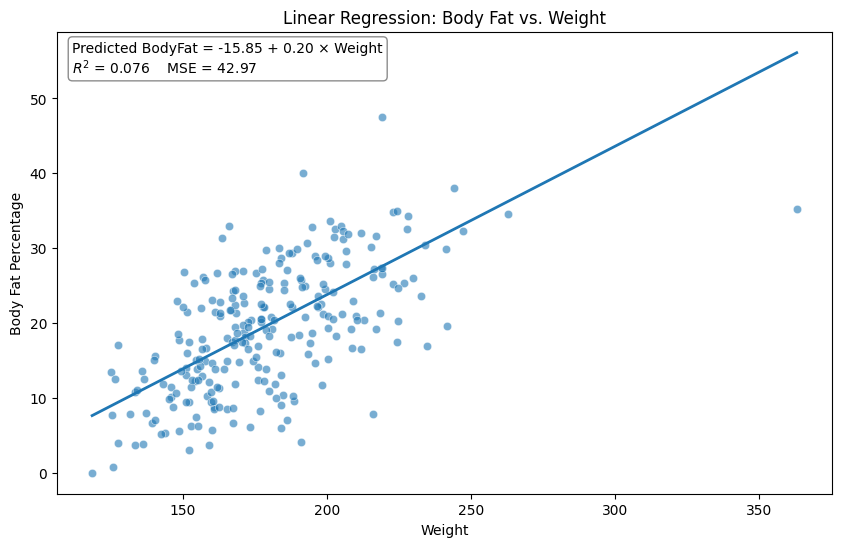

In [ ]:
import numpy as np

# Get learned parameters
b0 = model.intercept_
b1 = model.coef_[0]

# Create a smooth line across the data range
x_line = np.linspace(X['Weight'].min(), X['Weight'].max(), 200).reshape(-1, 1)
y_line = model.predict(x_line)

# Plot data + fitted line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='BodyFat', alpha=0.6)
plt.plot(x_line, y_line, linewidth=2)  # fitted line

# Title & labels
plt.title('Linear Regression: Body Fat vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Body Fat Percentage')

# Annotate with equation and metrics
eq_text = (
    f"Predicted BodyFat = {b0:.2f} + {b1:.2f} × Weight\n"
    f"$R^2$ = {r2:.3f}    MSE = {mse:.2f}"
)
plt.text(
    0.02, 0.98, eq_text, transform=plt.gca().transAxes,
    va='top', ha='left',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.9)
)

plt.show()


**What do you think of the R^2 value?**